In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This cell deals with loading the data and making it useful and presentable.
metric = pd.read_csv("arrests.tsv",sep="\t")

# Group by neighborhood and count the occurrences
metric_grouped = metric.groupby("INCIDENTNEIGHBORHOOD").size().reset_index(name="count")

# Sort by count
mgc = metric_grouped.sort_values(by="count")

# Create a sequential list to be assigned to the sorted neighborhoods
rank_list = [x for x in range(1,len(mgc)+1)]
mgc['Rank'] = rank_list

# Presentability
mgc = mgc.rename(columns={"INCIDENTNEIGHBORHOOD":"Neighborhood","count":"Arrests"})
mgc=mgc[['Rank','Neighborhood','Arrests']]


Text(0.5, 1.0, 'Arrests by Neighborhoods')

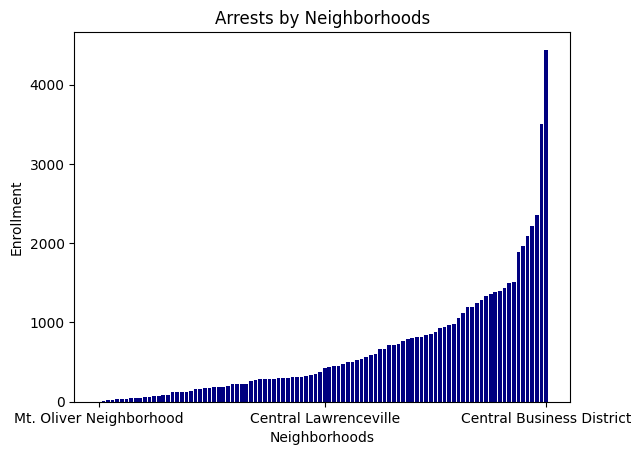

In [3]:
# This cell deals with presenting the data

x_data = mgc['Neighborhood']
y_data = mgc['Arrests']

# Prepare a plot
plt.bar(x_data,y_data,color="navy")
plt.xlabel("Neighborhoods")
plt.ylabel("Enrollment")

# Show only some ticks on the x axis, evenly spread to make it presentable.
mid_ind = len(mgc)//2
semimid_ind = mid_ind//2
xtlist1 = [0,mid_ind,len(mgc)-1]
xtlist2 = [x_data.iloc[0],x_data.iloc[mid_ind],x_data.iloc[len(mgc)-1]]

plt.xticks(xtlist1,xtlist2)
plt.title("Arrests by Neighborhoods")

In [4]:
# This cell deals with printing the output of the conclusion onto the 
# command line, and exporting the data into a csv file for further use

print(mgc.to_string(index=False))
mgc.to_csv("arrests_rank.csv",index=False)

 Rank                Neighborhood  Arrests
    1     Mt. Oliver Neighborhood        2
    2      Troy Hill-Herrs Island        6
    3             Mt. Oliver Boro       18
    4           Central Northside       23
    5                   Ridgemont       37
    6               Regent Square       37
    7               New Homestead       39
    8              Swisshelm Park       43
    9              Chartiers City       46
   10               East Carnegie       48
   11                   St. Clair       55
   12              Outside County       57
   13               Outside State       67
   14                 Summer Hill       76
   15                     Oakwood       82
   16 Golden Triangle/Civic Arena       83
   17                        Hays      120
   18                     Windgap      124
   19                Mount Oliver      124
   20                   Fairywood      127
   21              Allegheny West      130
   22           Arlington Heights      155
   23      

Using pandas we separated each neighborhood by the amount of crimes committed in each. This was done by counting each crime committed by checking every occurance of an incident associated within a neighborhood, which has lead us to the chart above.

Using this data, we have concluded that Mt. Oliver Neighborhood would be the safest for children to be raised in due to the low amount of crimes being committed there.